<a href="https://colab.research.google.com/github/Suwandi-amin-sangaji/plastik_vgg16/blob/main/skripsi_plastik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import keras, tensorflow dan VGG16
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
from PIL import Image
import os

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
base_dir = '/Users/suwandiaminsangaji/Desktop/Skripsiku/aplikasi/dataset'

In [4]:
# Mengambil data traning
train_dir = os.path.join(base_dir, 'train')
# mengambil data validation
val_dir = os.path.join(base_dir, 'val')

classes=["hdpe","ldpe","other","pet","pp","ps",'pvc']

In [5]:
# mengambil data setip classnya
train_hdpe_dir = os.path.join(base_dir, 'train/hdpe')
train_ldpe_dir = os.path.join(base_dir, 'train/ldpe')
train_other_dir = os.path.join(base_dir, 'train/other')
train_pet_dir = os.path.join(base_dir, 'train/pet')
train_pp_dir = os.path.join(base_dir, 'train/pp')
train_ps_dir = os.path.join(base_dir, 'train/ps')
train_pvc_dir = os.path.join(base_dir, 'train/pvc')

val_hdpe_dir = os.path.join(base_dir, 'val/hdpe')
val_ldpe_dir = os.path.join(base_dir, 'val/ldpe')
val_other_dir = os.path.join(base_dir, 'val/other')
val_pet_dir = os.path.join(base_dir, 'val/pet')
val_pp_dir = os.path.join(base_dir, 'val/pp')
val_ps_dir = os.path.join(base_dir, 'val/ps')
val_pvc_dir = os.path.join(base_dir, 'val/pvc')

In [6]:
# melihat isi
train_hdpe_fnames = os.listdir(train_hdpe_dir)
train_ldpe_fnames= os.listdir(train_ldpe_dir)
train_other_fnames = os.listdir(train_other_dir)
train_pet_fnames = os.listdir(train_pet_dir)
train_pp_fnames = os.listdir(train_pp_dir)
train_ps_fnames = os.listdir(train_ps_dir)
train_pvc_fnames = os.listdir(train_pvc_dir)

print(train_hdpe_fnames[:7])
print(train_ldpe_fnames[:7])
print(train_other_fnames[:7])
print(train_pet_fnames[:7])
print(train_pp_fnames[:7])
print(train_ps_fnames[:7])
print(train_pvc_fnames[:7])


['IMG_20191229_140017.jpg', 'IMG_20191229_140214.jpg', 'IMG_20191229_142203.jpg', 'IMG_20191229_140101.jpg', 'IMG_20191229_142249.jpg', 'IMG_20191229_140113.jpg', 'IMG_20191229_143425.jpg']
['IMG_20191229_141524.jpg', 'IMG_20191229_141451.jpg', 'IMG_20191229_141318.jpg', 'IMG_20191229_141838.jpg', 'IMG_20191229_141353.jpg', 'IMG_20191229_141439.jpg', 'IMG_20191229_141216.jpg']
['IMG_20191229_142215.jpg', 'IMG_20191229_143146.jpg', 'IMG_20191229_143157.jpg', 'IMG_20191229_143205.jpg', 'IMG_20191229_142236.jpg', 'IMG_20191229_142221.jpg']
['plastic391.jpg', 'plastic420.jpg', 'plastic346.jpg', 'plastic62.jpg', 'plastic227.jpg', 'IMG_20191227_151309(1).jpg', 'plastic409.jpg']
['IMG_20191229_143330.jpg', 'IMG_20191229_143319.jpg', 'IMG_20191229_140809.jpg', 'IMG_20191229_143247.jpg', 'IMG_20191229_143336.jpg', 'IMG_20191229_143242.jpg', 'IMG_20191229_142605.jpg']
['images.jpeg', 'Mandiri_Plastik___Streofoam_sedang.jpeg', 'open-white-styrofoam-box-isolated-white-background_1373-1034.jpg', 'S

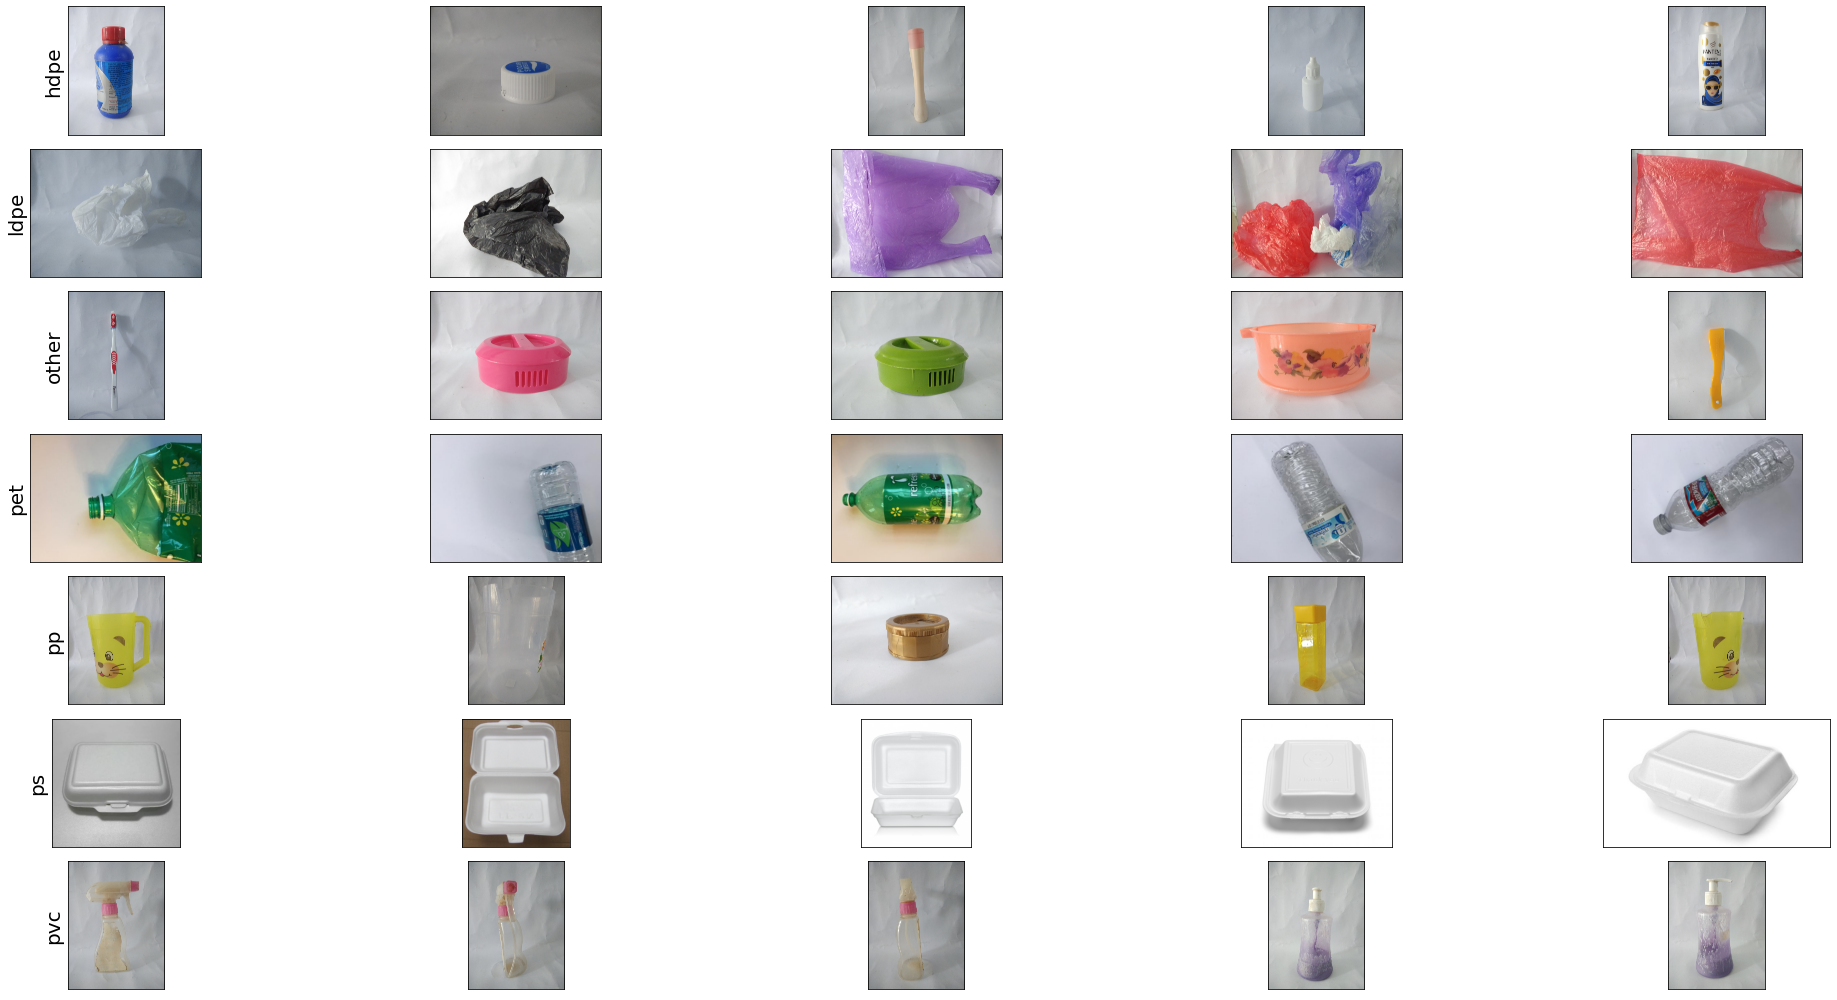

In [11]:
plt.figure(figsize=(30,14))

for i in range(7):
    directory = os.path.join(train_dir, classes[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = Image.open(path)
        
        plt.subplot(7, 5, i*5 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(classes[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [8]:
print("total traning hdpe images : ", len(train_hdpe_fnames))
print("total traning ldpe images : ", len(train_ldpe_fnames))
print("total traning other images : ", len(train_other_fnames))
print("total traning pet images : ", len(train_pet_fnames))
print("total traning pp images : ", len(train_pp_fnames))
print("total traning ps images : ", len(train_ps_fnames))
print("total traning pvc images : ", len(train_pvc_fnames))

print('=====================================================')

print("total validation hdpe images : ", len(val_hdpe_dir))
print("total validation ldpe images : ", len(val_ldpe_dir))
print("total validation other images : ", len(val_other_dir))
print("total validation pet images : ", len(val_pet_dir))
print("total validation pp images : ", len(val_pp_dir))
print("total validation ps images : ", len(val_ps_dir))
print("total validation pvc images : ", len(val_pvc_dir))

total traning hdpe images :  15
total traning ldpe images :  14
total traning other images :  6
total traning pet images :  142
total traning pp images :  25
total traning ps images :  18
total traning pvc images :  5
total validation hdpe images :  69
total validation ldpe images :  69
total validation other images :  70
total validation pet images :  68
total validation pp images :  67
total validation ps images :  67
total validation pvc images :  68


In [9]:
# membuat arsitektur jaringan untuk klasifikasi
# menggunakan VGG16
conv_base = VGG16(include_top=False, weights='imagenet',  input_shape=(150,150,3))
conv_base.trainable = False

58900480/58889256 [==============================] - 22s 0us/step


In [10]:
# Model Jaringan dengan model Squendtial
model = tf.keras.models.Sequential([
                                    conv_base,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 18,913,095
Trainable params: 4,198,407
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# plot_model(model)

In [12]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['acc'])

#Augmentasi data

In [13]:
# augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
    
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
     train_dir,
     target_size=(150,150),
     subset = 'training',
     class_mode='categorical',
     batch_size = 32,
 )
val_generator = val_datagen.flow_from_directory(
     val_dir,
     target_size=(150,150),
     subset = 'training',
     class_mode='categorical',
     batch_size = 32,
 )

Found 225 images belonging to 7 classes.
Found 225 images belonging to 7 classes.


In [16]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1
)

cb = [early_stopping]

In [18]:
from keras import callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = val_generator,
    callbacks= cb
)

Epoch 1/50
8/8 [==============================] - 176s 22s/step - loss: 18.2830 - acc: 0.3422 - val_loss: 7.4778 - val_acc: 0.6311
Epoch 2/50
8/8 [==============================] - 179s 24s/step - loss: 6.6163 - acc: 0.5644 - val_loss: 5.0390 - val_acc: 0.2311
Epoch 3/50
8/8 [==============================] - 171s 22s/step - loss: 2.1524 - acc: 0.5600 - val_loss: 1.1432 - val_acc: 0.7244
Epoch 4/50
8/8 [==============================] - 163s 21s/step - loss: 1.0838 - acc: 0.6800 - val_loss: 0.8602 - val_acc: 0.7022
Epoch 5/50
8/8 [==============================] - 174s 23s/step - loss: 0.8887 - acc: 0.6933 - val_loss: 0.8897 - val_acc: 0.6889
Epoch 6/50
8/8 [==============================] - 173s 25s/step - loss: 0.9654 - acc: 0.6489 - val_loss: 0.7296 - val_acc: 0.7333
Epoch 7/50
8/8 [==============================] - 169s 22s/step - loss: 0.8609 - acc: 0.6978 - val_loss: 0.6812 - val_acc: 0.7689
Epoch 8/50
8/8 [==============================] - 169s 24s/step - loss: 0.7794 - acc: 0.7

In [19]:
#evulate model
score = model.evaluate(val_generator)
print('Test Loss :',score[0])
print('Test Accuracy :',score[1])

8/8 [==============================] - 93s 11s/step - loss: 0.4210 - acc: 0.8444
Test Loss : 0.42097094655036926
Test Accuracy : 0.8444444537162781


In [ ]:
# dict(zip(classes, val_generator))

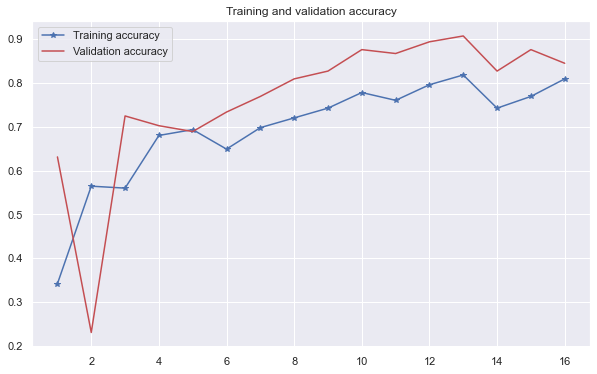

<Figure size 432x288 with 0 Axes>

In [20]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)
plt.figure(figsize=(10,6))
plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

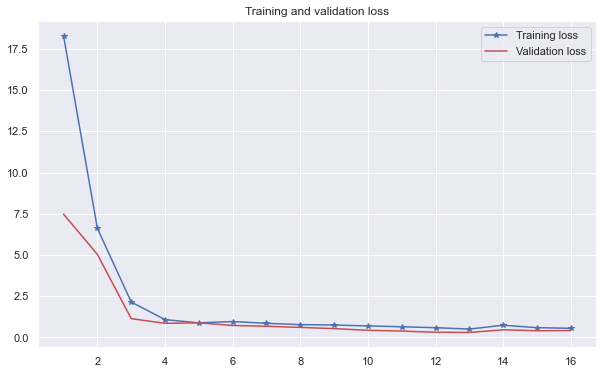

In [21]:
plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.preprocessing import image
output_class = ['HDPE', 'LDPE', 'OTHER', 'PET', 'PP', 'PS', 'PVC']
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (150,150))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

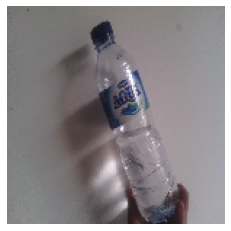

Your waste material is  PET  with  99.76  % accuracy


In [24]:
waste_prediction('/Users/suwandiaminsangaji/Desktop/Skripsiku/aplikasi/dataset/val/pet/aqua6.jpg')

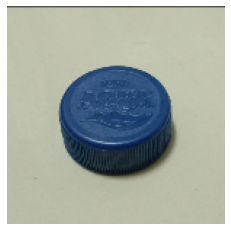

Your waste material is  PP  with  37.95  % accuracy


In [28]:
waste_prediction('/Users/suwandiaminsangaji/Downloads/tutupaqua.jpeg')

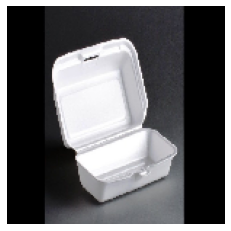

Your waste material is  PS  with  96.98  % accuracy


In [26]:
waste_prediction('/Users/suwandiaminsangaji/Desktop/Skripsiku/aplikasi/dataset/val/ps/sterofoam-styrofoam-1280x720.jpg')

In [ ]:
# save model untuk web
save = model.save("/content/drive/MyDrive/dataset/datasets-plastik/modelbaru/model.hdf5")
print('berhasil')

In [ ]:
# SaveModel
model.save('model.h5')
model.save('/content/drive/MyDrive/dataset/datasets-plastik/modelbaru/model-cnn-vgg16_new.h5')

matrix